## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Load data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dicoding_MLT/house_price_regression_dataset.csv')

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


## EDA

**deskripsi variabel**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


- Data memiliki sekitar 1000 entry
- terdapat 7 fitur numerik yaitu, Square_Footage, Num_Bedrooms, Num_Bathrooms,  Year_Built, Lot_Size, Garage_Size, Neighborhood_Quality, House_Price
- Fitur House_Price merupakan target fitur dalam case kali ini.

In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


- Square_Footage: Luas bangunan rumah (dalam satuan hektar). Rata-rata luas sebesar 2.815 hektar, dengan minimum 503 hektar  dan maksimum 4.999 hektar

- Num_Bedrooms: Jumlah kamar tidur. Rata-rata 3 kamar, berkisar antara 1 hingga 5 kamar.

- Num_Bathrooms: Jumlah kamar mandi. Rata-rata 2 kamar mandi, dengan maksimum 3.

- Year_Built: Tahun rumah dibangun. Rentang antara tahun 1950 hingga 2022.

- Lot_Size: Ukuran lahan rumah (dalam satuan acre). Rata-rata sebesar 2.78 dengan nilai maksimum sekitar 4.99.

- Garage_Size: Ukuran garasi (jumlah mobil yang dapat ditampung). Mayoritas rumah memiliki 1-2 ukuran garasi.

- Neighborhood_Quality: Skor kualitas lingkungan (skala 1–10). Rata-rata sebesar 5.6 dengan skor terendah 1 dan tertinggi 8

- House_Price: Harga rumah( dolar). Rata-rata sekitar 618.861, harga tertinggi 1.108.237 dan harga terendah 111.627.

**cek missing value**

In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


- tidak ditemukan adanya missing value

**cek duplicate**

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicate_count}")

Jumlah Data Duplikat: 0


- tidak ditemukan adanya duplikat

**cek outlier**

 metode IQR akan digunakan untuk mendefinisikan batas outlier (di luar 1.5 kali IQR dari kuartil atas dan bawah) dan kemudian menghitung berapa banyak baris dalam DataFrame Anda yang memiliki nilai di luar batas ini pada salah satu kolom numeriknya.

In [ ]:
num_cols = df.columns

# Hitung IQR untuk mendeteksi outlier
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Kondisi untuk outlier
outlier_condition = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_count = outlier_condition.sum()

print(f"Jumlah Outlier: {outlier_count}")


Jumlah Outlier: 0


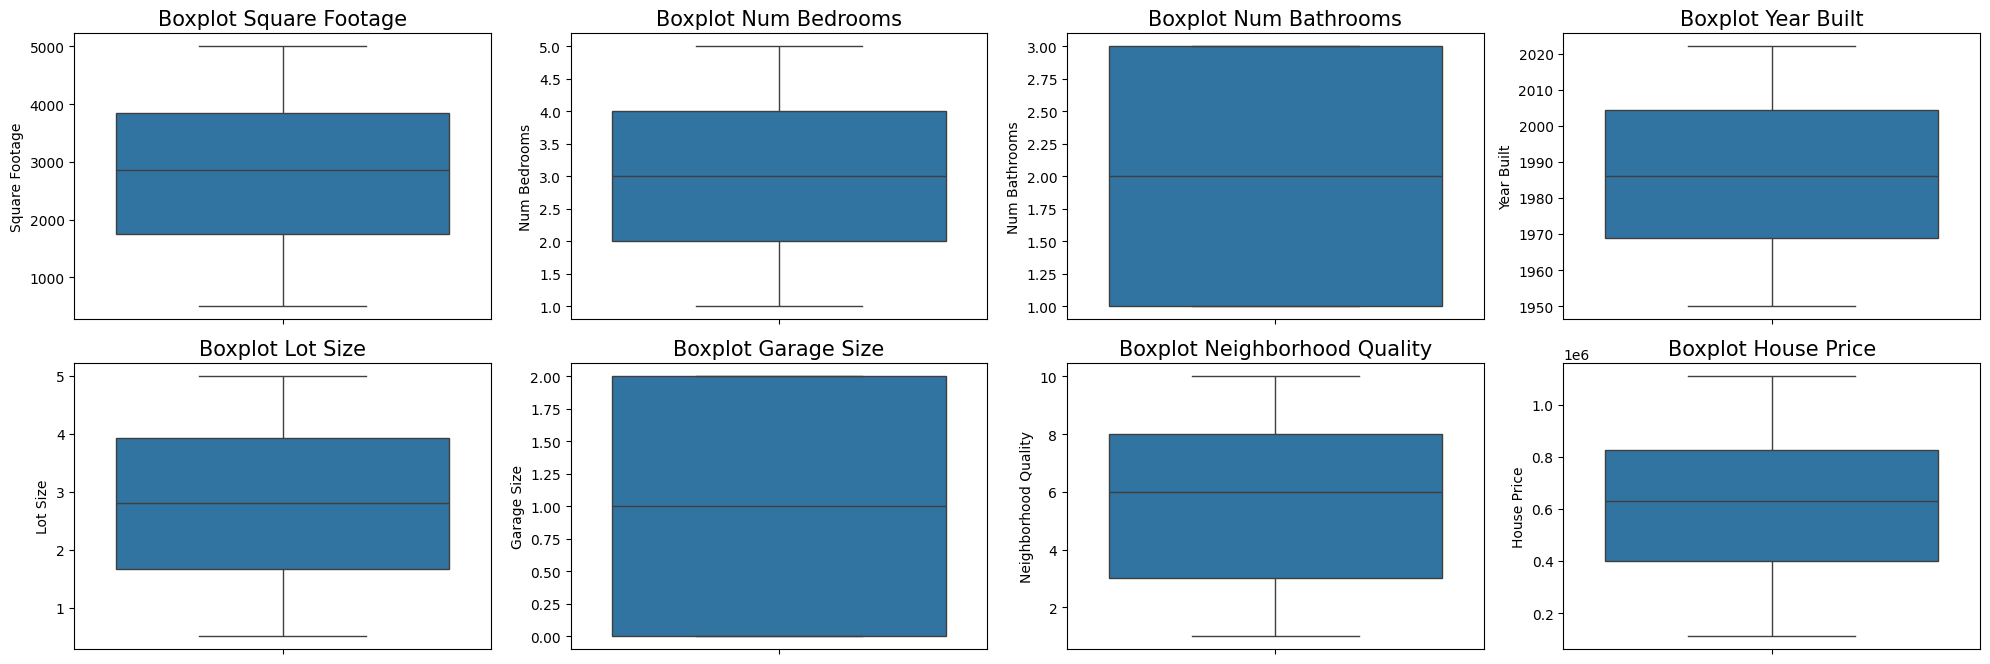

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col.replace("_", " ").title()}', size=15)
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()


- tidak ditemukan adanya outlier

**univariate analysis**

Analisis yang melibatkan satu variabel, fokus pada distribusi, nilai ekstrim, atau statistik deskriptif

In [ ]:
numerical_features = df.columns

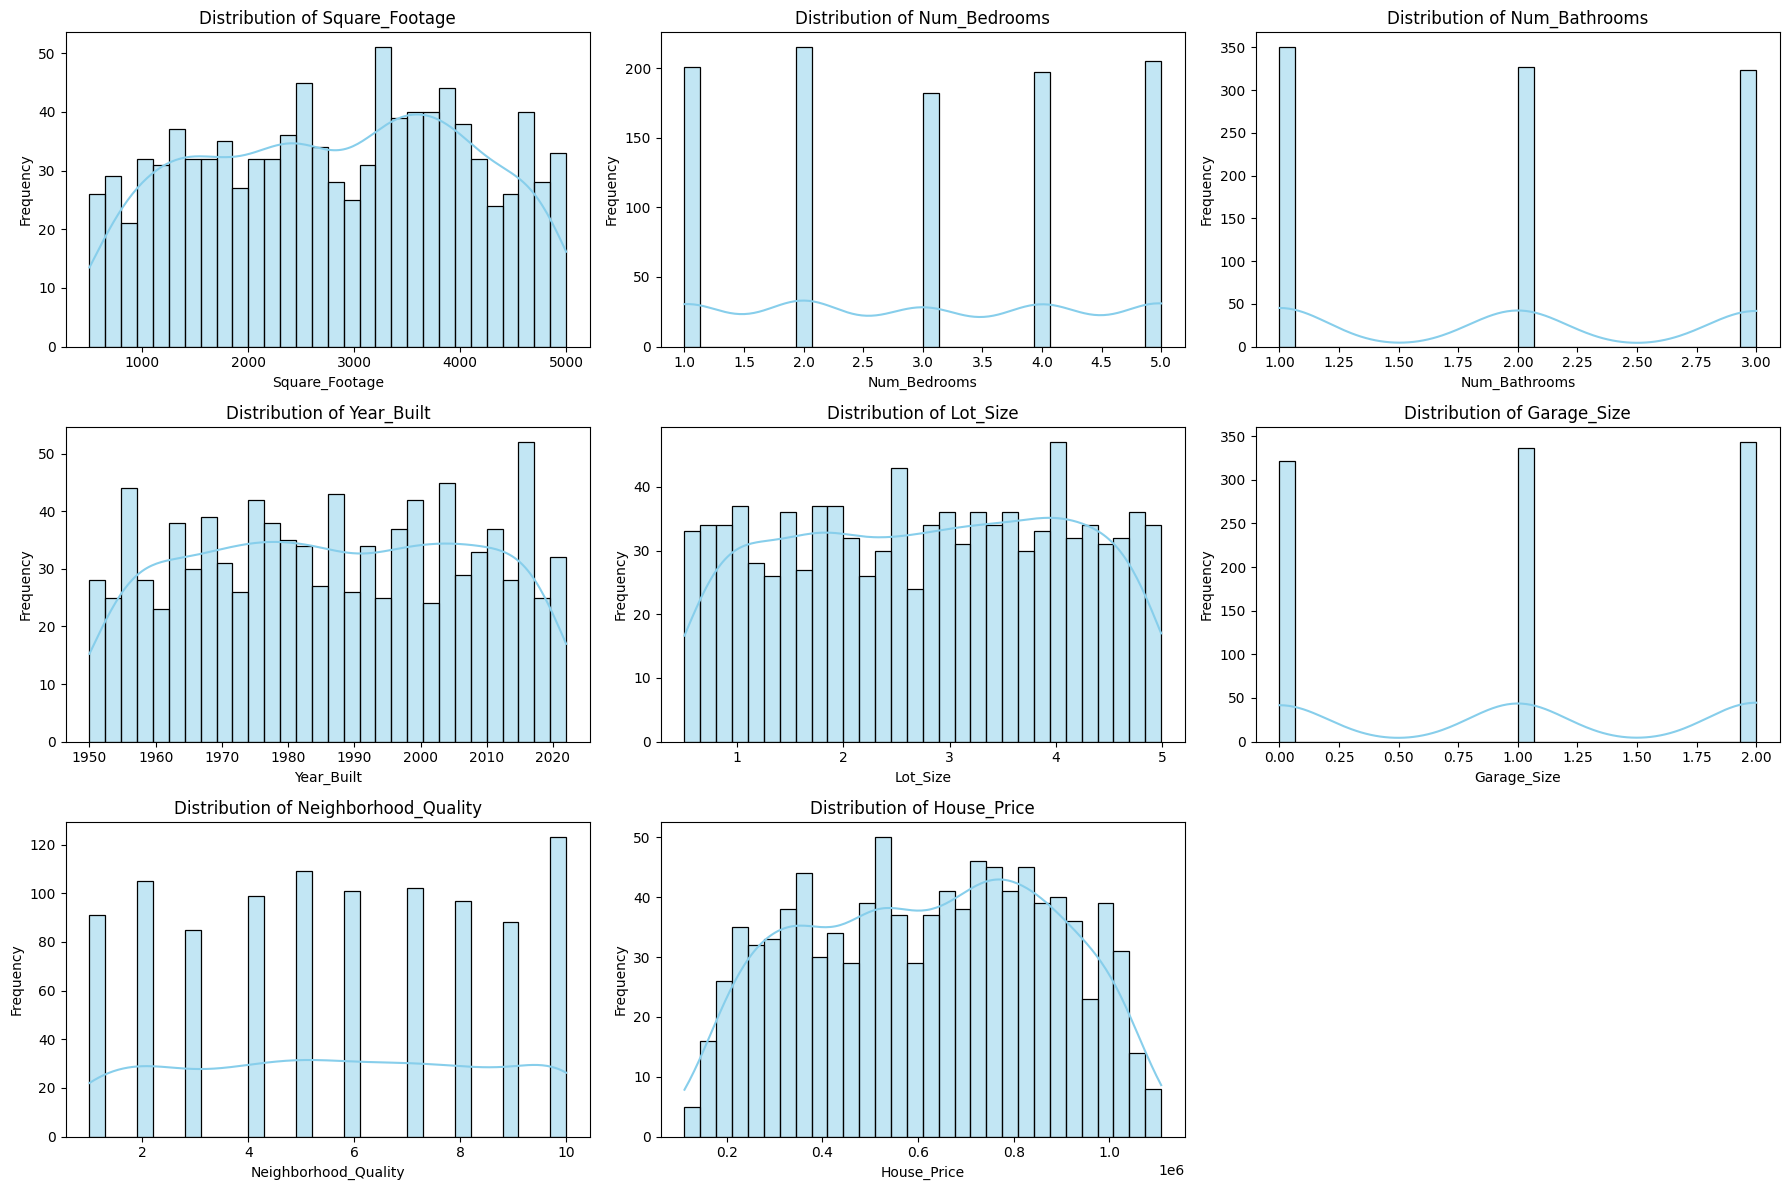

In [ ]:
# Set up subplot grid
n = len(numerical_features)
rows = (n // 3) + (n % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))

# Flatten axis array
axes = axes.flatten()

# Plot setiap fitur
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hapus subplot kosong (jika ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Diagram di atas menunjukkan distribusi frekuensi dari masing-masing fitur dalam dataset ini. Untuk fitur target dalam case ini (House_Price), memiliki distribusi harga rumah yang terlihat mendekati normal tetapi sedikit skew ke kiri (lebih banyak rumah dengan harga menengah ke tinggi).

**multivariate analysis**

 Analisis yang melibatkan dua atau lebih variabel untuk melihat hubungan antar fitur, pola, atau korelasi (misalnya scatter plot, korelasi, regresi).

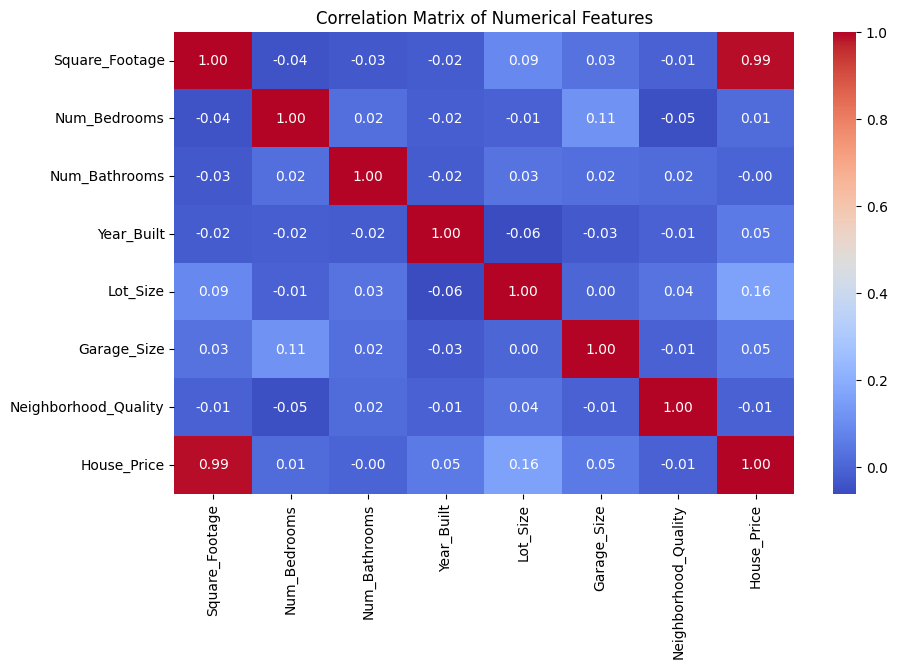

In [ ]:
plt.figure(figsize=(10, 6))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Visualisasi di atas menunjukkan matriks korelasi antar fitur numerik dalam dataset perumahan. Korelasi berkisar antara -1 (berbanding terbalik sempurna) hingga +1 (berbanding lurus sempurna). Warna lebih merah berarti korelasi lebih tinggi, sedangkan warna biru menunjukkan korelasi lemah atau negatif.

- Square_Footage ↔ House_Price: 0.99 :
  Hubungan sangat kuat dan positif. Artinya, semakin besar ukuran rumah, semakin tinggi harga rumah.

Fitur lain seperti:
- Lot_Size, Garage_Size, dan Year_Built memiliki korelasi lemah dengan harga rumah (masing-masing di bawah 0.2).
- Num_Bedrooms, Num_Bathrooms, dan Neighborhood_Quality hampir tidak memiliki korelasi signifikan dengan harga rumah.

- Korelasi antar fitur lainnya juga sangat rendah, menunjukkan tidak ada multikolinearitas yang kuat di antara sebagian besar fitur.



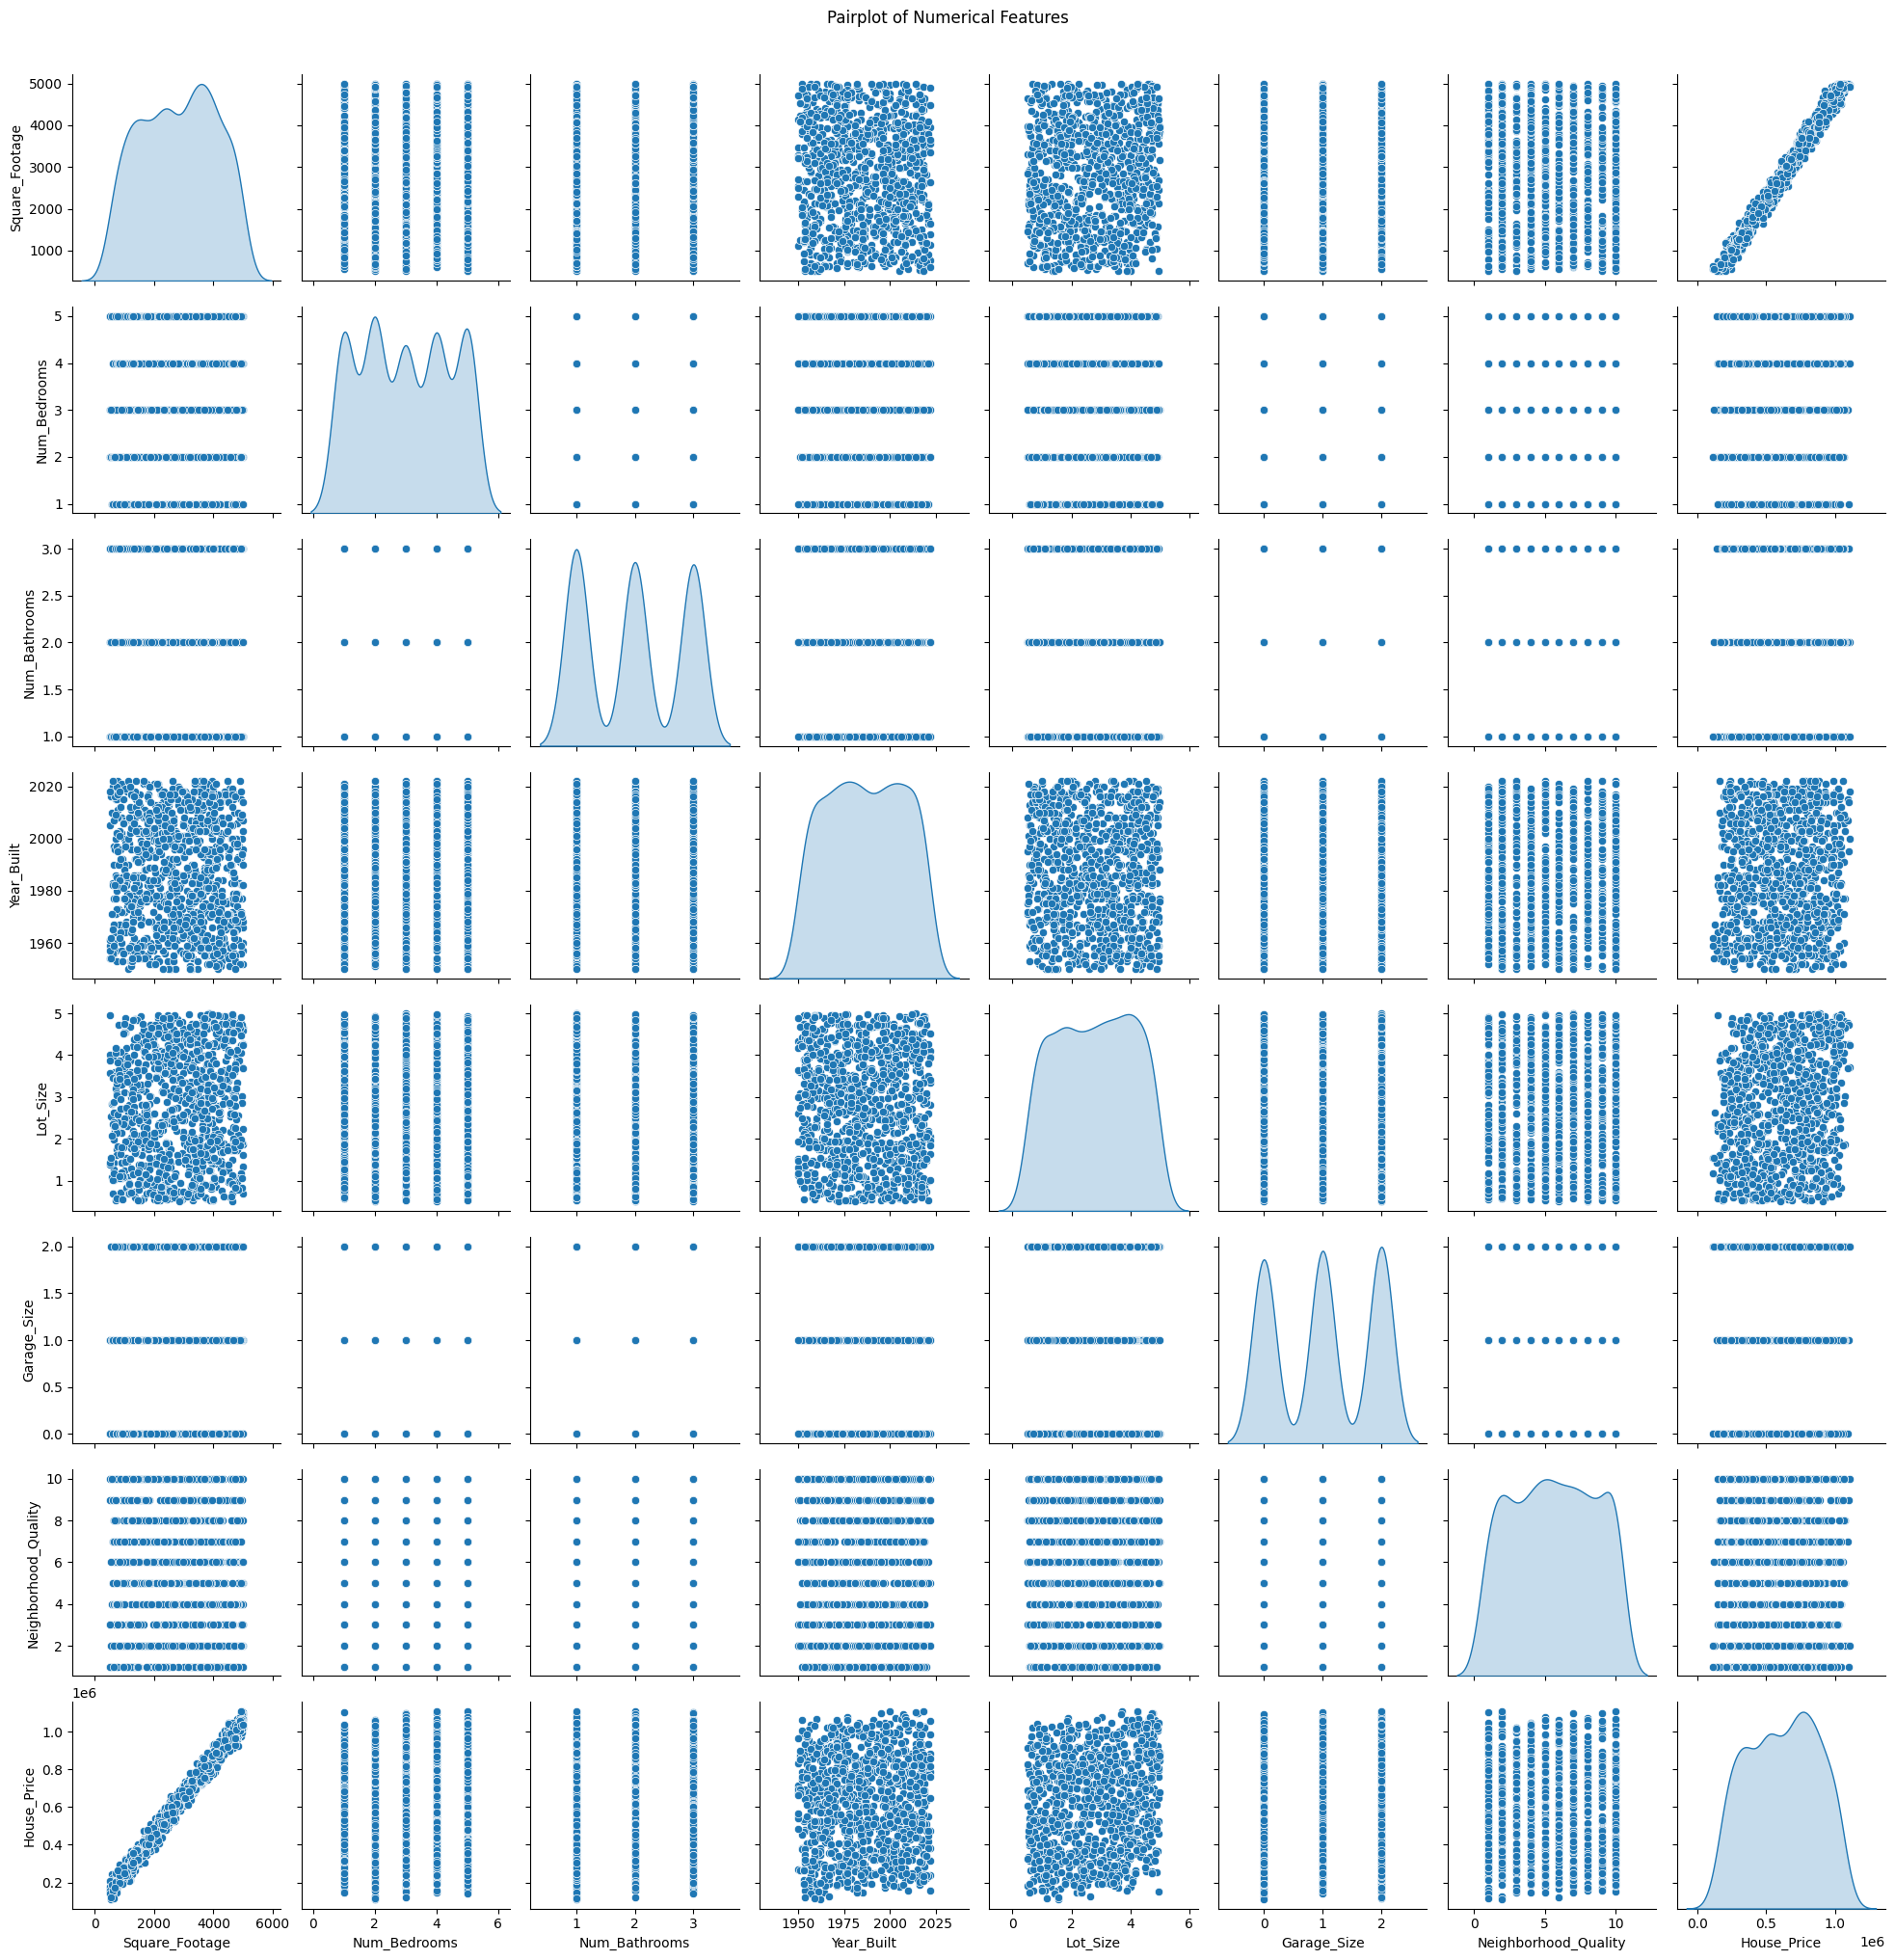

In [ ]:
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


Visualisasi di atas adalah pairplot, yang menunjukkan hubungan pasangan antar fitur numerik dalam dataset. Untuk Square_Footage dengan House_Price, Terlihat hubungan linear yang sangat kuat, garisnya tampak lurus dan naik yang menguatkan bahwa ada korelasi tinggi seperti yang dilihat pada visualisasi sebelumnya (0.99).

## Data Preparation

Selanjutnya akan dilakukan Pembagian dataset (splitting data) ke dalam data uji dan latih. Proses ini akan dilakukan terlebih dahulu sebelum proses transformasi seperti standarisasi untuk mencegah kebocoran data (data leakage) yakni data uji bisa "tercemar" oleh informasi dari data latih (seperti mean dan standar deviasi), sehingga hasil evaluasi model menjadi tidak valid.

Pada kasus ini,  akan diggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split.

In [ ]:
df_preprocessed = df.copy()

**train-test-split**

In [ ]:
# Drop kolom 'Price' sebagai target
X = df_preprocessed.drop(['House_Price'], axis=1)
y = df_preprocessed['House_Price']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Tampilkan jumlah data
print(f"Jumlah data total     : {len(df_preprocessed)}")
print(f"Jumlah data training  : {len(X_train)}")
print(f"Jumlah data testing   : {len(X_test)}")

Jumlah data total     : 1000
Jumlah data training  : 800
Jumlah data testing   : 200


**standarisasi**



Standarisasi bertujuan mempermudah pemrosesan oleh algoritma dengan menyamakan skala fitur. Menggunakan StandardScaler dari Scikit-learn, setiap fitur (kecuali fitur target yakni, House_Price) diubah agar memiliki mean 0 dan standar deviasi 1.

In [ ]:
# Fitur numerik yang distandarisasi
numerical_features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size',	'Neighborhood_Quality']

# Inisialisasi scaler
scaler = StandardScaler()

# Fit ke training set dan transform
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform test set
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
X_train.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
29,-0.627722,-0.681986,1.261133,-0.957011,-0.770120,1.201331,-1.234358
535,0.563185,1.429971,1.261133,-1.005096,0.965113,-1.237920,1.511520
695,1.352331,-0.681986,1.261133,1.302982,1.052757,-1.237920,0.481816
557,0.444973,0.725985,0.035244,0.629793,-0.929572,-1.237920,-1.577593
836,0.045608,1.429971,-1.190644,-0.620416,0.510449,1.201331,0.138581


In [ ]:
y_train.head()

,House_Price
29,434165.896634
535,788284.690202
695,985499.196316
557,736289.124555
836,636552.752485


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        800 non-null    float64
 1   Num_Bedrooms          800 non-null    float64
 2   Num_Bathrooms         800 non-null    float64
 3   Year_Built            800 non-null    float64
 4   Lot_Size              800 non-null    float64
 5   Garage_Size           800 non-null    float64
 6   Neighborhood_Quality  800 non-null    float64
dtypes: float64(7)
memory usage: 50.0 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 800 entries, 29 to 102
Series name: House_Price
Non-Null Count  Dtype  
--------------  -----  
800 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


In [ ]:
X_test.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
521,0.956959,0.022000,-1.190644,1.399152,-0.525799,-0.018294,-0.204654
737,-0.402480,0.022000,-1.190644,0.052773,-1.093878,-0.018294,-0.547889
740,1.512876,-1.385972,1.261133,-1.197436,-0.763741,-0.018294,0.825051
660,1.691791,-0.681986,-1.190644,-0.716586,1.331359,-0.018294,-1.234358
411,0.664624,-1.385972,-1.190644,0.341283,0.942529,-1.237920,1.168285


In [ ]:
y_test.head()

,House_Price
521,9.010005e+05
737,4.945375e+05
740,9.494042e+05
660,1.040389e+06
411,7.940100e+05


## Model Development

Pada tahapan ini, kita akan menggunakan dua algoritma yakni Regresi Linear dan Random Forest Regressor untuk memprediksi harga penjualan rumah.

**Regresi Linear**

 Model ini mencoba menemukan hubungan linear antara fitur-fitur (variabel independen) dan variabel target (House_Price). Secara sederhana, model ini mencari garis lurus (atau hyperplane dalam dimensi yang lebih tinggi) yang paling sesuai dengan data.

 Kelebihan dari model ini adalah mudah untuk diinterpretasikan (melalui koefisien), komputasi yang cepat, dan bekerja baik jika hubungan antar variabel memang linear. Namun terdapat juga beberapa keterbatasan, seperti mengasumsikan hubungan linear dan sensitif terhadap outlier

In [ ]:
# Inisialisasi model Regresi Linear
linear_reg = LinearRegression()

# Melatih model menggunakan data training
linear_reg.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred_linear = linear_reg.predict(X_test)

**Random Forest Regressor**

Model ini merupakan ensemble learning method yang membangun banyak pohon keputusan (decision trees) secara acak pada subset data dan fitur yang berbeda. Hasil prediksi adalah rata-rata dari prediksi semua pohon.

Kelebihan dari model ini adalah kemampuannya unutk menangkap hubungan non-linear dan interaksi antar fitur dengan baik serta lebih robust terhadap outliers. sementara itu ada beberapa kekurangan dari model ini yakni, lebih sulit diinterpretasikan dibandingkan Regresi Linear, bisa menjadi lebih lambat secara komputasi, terutama dengan banyak pohon.

In [ ]:
# Inisialisasi model Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model menggunakan data training
random_forest_reg.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred_rf = random_forest_reg.predict(X_test)

## Evaluasi

Pada bagian ini, kita akan mengevaluasi kinerja model Regresi Linear dan Random Forest menggunakan metrik, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan R-squared (R2).

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Evaluasi Model Regresi Linear:")
print(f"  Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"  R-squared (R2): {r2_linear:.4f}")

Evaluasi Model Regresi Linear:
  Mean Squared Error (MSE): 101434798.5056
  Root Mean Squared Error (RMSE): 10071.4844
  Mean Absolute Error (MAE): 8174.5836
  R-squared (R2): 0.9984


In [ ]:
# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Evaluasi Model Random Forest:")
print(f"  Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"  R-squared (R2): {r2_rf:.4f}")

Evaluasi Model Random Forest:
  Mean Squared Error (MSE): 394154497.0413
  Root Mean Squared Error (RMSE): 19853.3246
  Mean Absolute Error (MAE): 16106.2722
  R-squared (R2): 0.9939


Berdasarkan evaluasi, Model Regresi Linear menunjukkan performa prediksi harga rumah yang lebih baik daripada Model Random Forest pada dataset ini. Hal ini ditunjukkan oleh nilai kesalahan (MSE, RMSE, MAE) yang lebih rendah dan nilai R-squared yang sedikit lebih tinggi, meskipun keduanya memiliki R-squared yang sangat tinggi. Ini mengindikasikan bahwa Regresi Linear sedikit lebih akurat dalam memprediksi harga dan lebih baik dalam menjelaskan variasi data

**Analisis Koefisien**

Setelah pelatihan, koefisien model Regresi Linear dianalisis untuk memahami pengaruh linear setiap fitur terhadap prediksi harga rumah.

In [ ]:
# Mendapatkan koefisien
coefficients = linear_reg.coef_

# Mendapatkan nama-nama fitur dari data training
feature_names = X_train.columns

# Membuat DataFrame untuk menampilkan koefisien bersama dengan nama fitur
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Mencetak DataFrame koefisien
print("Koefisien Model Regresi Linear:")
print(coefficients_df)

intercept = linear_reg.intercept_
print(f"\nIntercept Model: {intercept:.4f}")

Koefisien Model Regresi Linear:
                Feature    Coefficient
0        Square_Footage  249787.914843
1          Num_Bedrooms   14524.734398
2         Num_Bathrooms    6695.906775
3            Year_Built   20662.121612
4              Lot_Size   19088.111033
5           Garage_Size    4219.449419
6  Neighborhood_Quality     335.247488

Intercept Model: 618576.0544


- Interpretasi koefisien Regresi Linear menunjukkan bahwa luas area rumah memiliki pengaruh positif terbesar terhadap harga.
- Fitur lain yang juga signifikan secara positif adalah Year_Built dan dan Lot_Size. Sementara itu, jumlah kamar tidur dan kamar mandi memiliki pengaruh positif yang lebih kecil, dan ukuran garasi serta kualitas lingkungan memiliki pengaruh positif yang relatif paling kecil.
- Hasil perkiraan harga awal dari sebuah rumah (apabila semua fitur dinggap 0) berdasarkan model Regresi Linear adalah 618576.0544